In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("carbon_aware_ml_dataset.csv")


In [2]:
df.head()

,timestamp,model_type,batch_size,cpu_usage_percent,gpu_usage_percent,memory_usage_gb,power_consumption_watts,energy_kwh,carbon_intensity_gCO2_per_kWh,co2_emissions_g,inference_time_ms,accuracy_score
0,2025-01-01 00:00:00,XGBoost,32,41.835910,72.026792,2.272900,244.234380,0.020353,509.453462,10.368838,439.616555,0.761419
1,2025-01-01 00:05:00,RandomForest,128,90.810716,68.728300,2.020470,245.476364,0.020456,361.865872,7.402460,307.685948,0.856859
2,2025-01-01 00:10:00,RandomForest,32,72.219485,9.575420,31.280335,148.241115,0.012353,421.692793,5.209351,398.138498,0.608473
3,2025-01-01 00:15:00,NeuralNetwork,128,60.885971,92.257240,3.816210,274.954568,0.022913,210.412762,4.821163,119.201306,0.713580
4,2025-01-01 00:20:00,NeuralNetwork,32,23.261584,56.847220,62.421018,135.788026,0.011316,237.174941,2.683793,180.811538,0.943775


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp                      8000 non-null   str    
 1   model_type                     8000 non-null   str    
 2   batch_size                     8000 non-null   int64  
 3   cpu_usage_percent              8000 non-null   float64
 4   gpu_usage_percent              8000 non-null   float64
 5   memory_usage_gb                8000 non-null   float64
 6   power_consumption_watts        8000 non-null   float64
 7   energy_kwh                     8000 non-null   float64
 8   carbon_intensity_gCO2_per_kWh  8000 non-null   float64
 9   co2_emissions_g                8000 non-null   float64
 10  inference_time_ms              8000 non-null   float64
 11  accuracy_score                 8000 non-null   float64
dtypes: float64(9), int64(1), str(2)
memory usage: 750.1 KB


In [4]:
df.isnull().sum()

timestamp                        0
model_type                       0
batch_size                       0
cpu_usage_percent                0
gpu_usage_percent                0
memory_usage_gb                  0
power_consumption_watts          0
energy_kwh                       0
carbon_intensity_gCO2_per_kWh    0
co2_emissions_g                  0
inference_time_ms                0
accuracy_score                   0
dtype: int64

In [5]:
df = df.drop(columns=["energy_kwh", "power_consumption_watts", "timestamp"])


In [6]:
df.columns

Index(['model_type', 'batch_size', 'cpu_usage_percent', 'gpu_usage_percent',
       'memory_usage_gb', 'carbon_intensity_gCO2_per_kWh', 'co2_emissions_g',
       'inference_time_ms', 'accuracy_score'],
      dtype='str')

In [7]:
df = pd.get_dummies(df, columns=["model_type"], drop_first=True)


In [8]:
df.columns

Index(['batch_size', 'cpu_usage_percent', 'gpu_usage_percent',
       'memory_usage_gb', 'carbon_intensity_gCO2_per_kWh', 'co2_emissions_g',
       'inference_time_ms', 'accuracy_score', 'model_type_NeuralNetwork',
       'model_type_RandomForest', 'model_type_XGBoost'],
      dtype='str')

In [9]:
X = df.drop(columns=["co2_emissions_g"])
y = df["co2_emissions_g"]


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(6400, 10) (1600, 10)
(6400,) (1600,)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [13]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [14]:
print("RandomForest Regressor Results:")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")

RandomForest Regressor Results:
MSE: 0.7043
MAE: 0.6449
R2 Score: 0.9419


In [15]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [16]:
print("XGB Regressor Results:")
print(f"MSE: {mse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

XGB Regressor Results:
MSE: 0.7093
MAE: 0.6452
R2 Score: 0.9415


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
rf_importances = rf.feature_importances_
features = X.columns

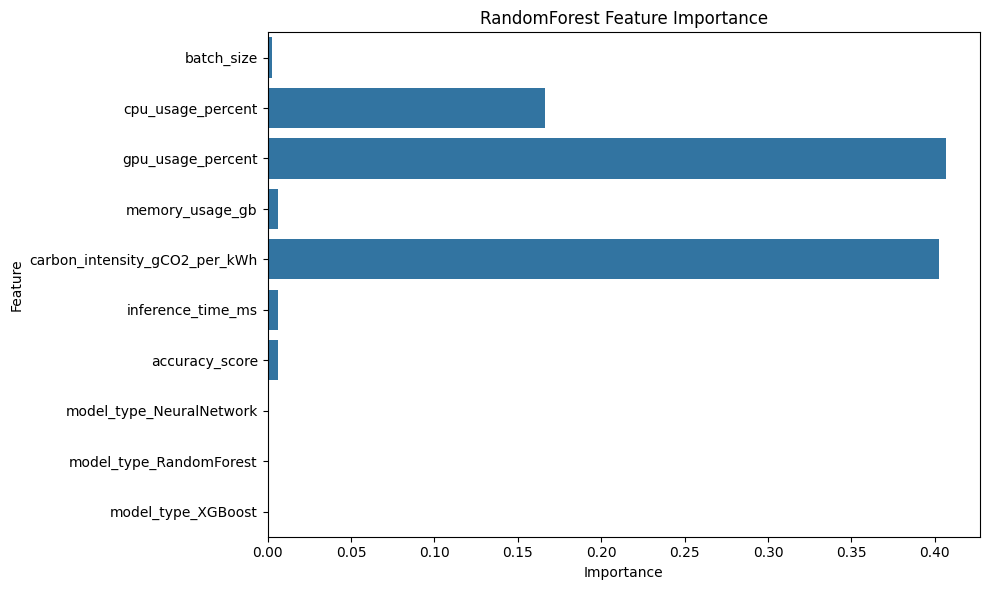

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=features)
plt.title("RandomForest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
xgb_importances = xgb.feature_importances_

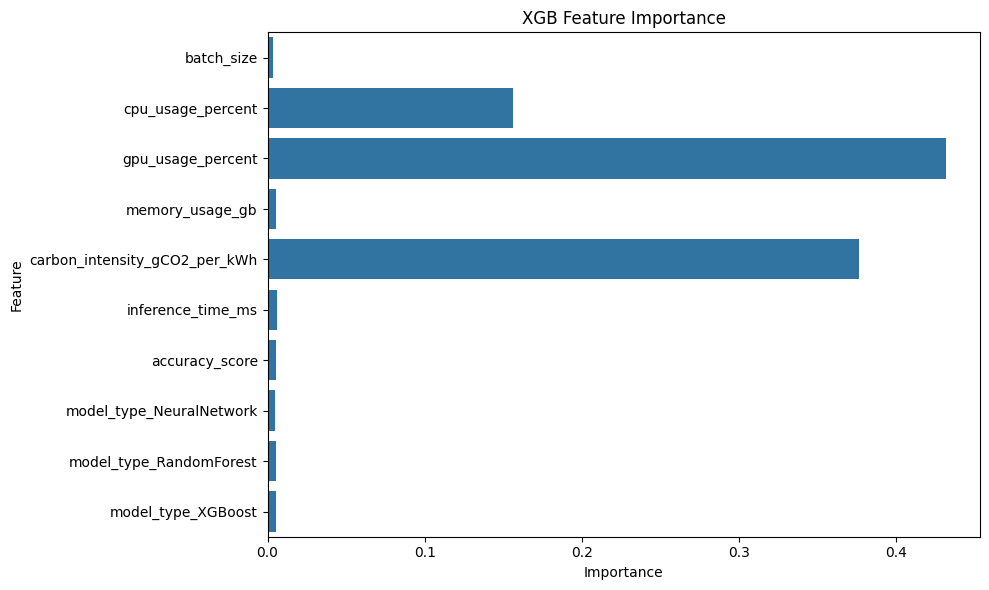

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances, y=features)
plt.title("XGB Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [24]:
y_pred_rf = rf.predict(X_test)

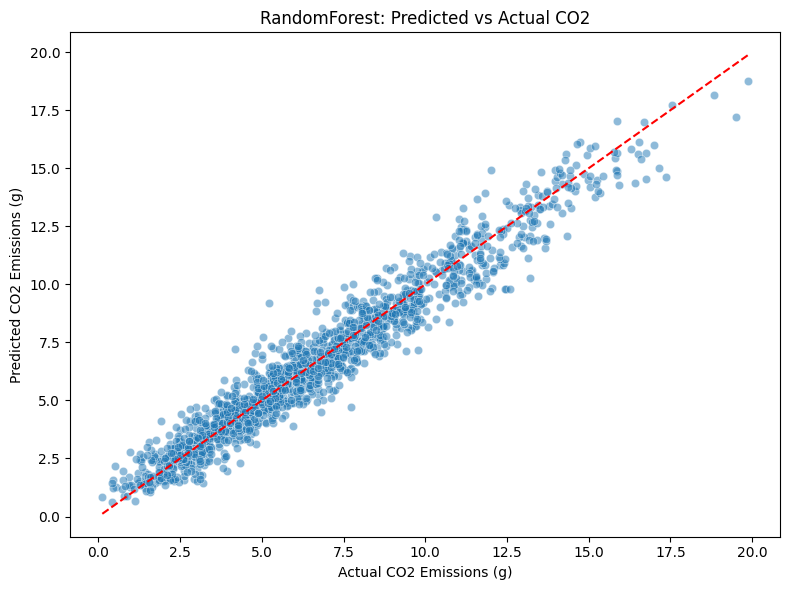

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 Emissions (g)")
plt.ylabel("Predicted CO2 Emissions (g)")
plt.title("RandomForest: Predicted vs Actual CO2")
plt.tight_layout()
plt.show()

In [26]:
residuals_rf = y_test - y_pred_rf

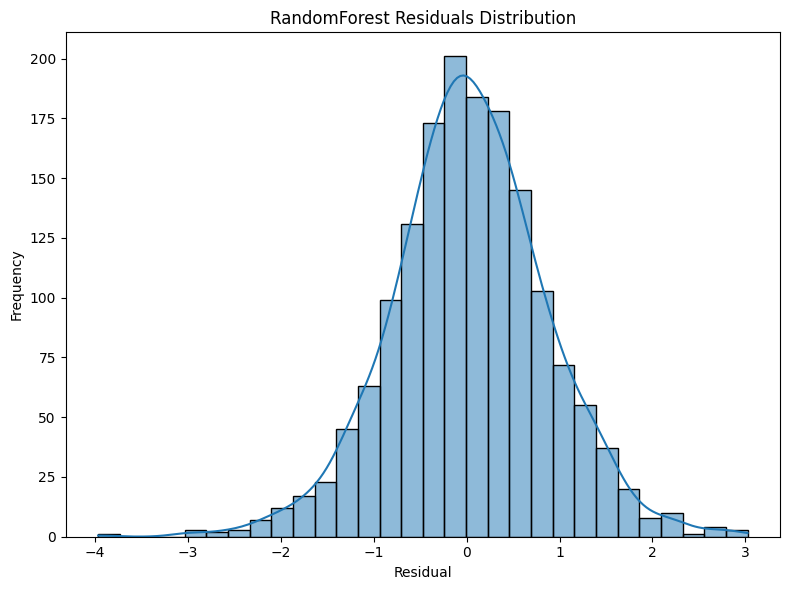

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title("RandomForest Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [28]:
y_pred_xgb = xgb.predict(X_test)


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 Emissions (g)")
plt.ylabel("Predicted CO2 Emissions (g)")
plt.title("XGB: Predicted vs Actual CO2")
plt.tight_layout()
plt.show()